# Financial time series analysis - Airlines and Aircraft Manufacturers

As defined in Investopedia A time series is a sequence of numerical data points in successive order. Generally, observation points are successively equally spaced in time. Most of the financial data is in the time series format and hence "Financial Time Series Analysis" is an important tool for anyone trying to understand the historical movements, predict the future movements or manage the risk associated with the future movements.

We will through the following steps



1.  Get access to the data and understand it
  *   Load data using pandas_datareader
  *   Understand data
2.  Plot time series data
  *   Plot the stock price data
  *   Plot subplot to price and volumne traded
  *   Normalize the time series to better compare price change
3.  Returns Calculation
  *   Calculate simple return
  *   Calculate and plot daily returns
  *   Calculate the Compound Annual Growth Rate(CAGR)
4.  Volatility calculation
  *   Calculate annualized volatility
  *   Calculate and plot the rolling volatility
  *   Relationship between Vol and returns
5.  Correlation calculation
  *   Generate pair-wise plot and analyse
  *   Generate correlation metrics
6.  Returns distribution and analysis
  *   Plot the return distribution
  *   Normality test
7.  Monthly plot
  *   Comment on seasonality
8.  Digging deep
  *   Perform the drawdown analysis


  We're going to use the market information from some United States Airlines, European Airlines and Aircraft manufacturers. 
This is the list of company names and their stock ticker symbols:
* American Airlines Group Inc. (AAL)
* Delta Air Lines, Inc. (DAL)
* United Airlines Holdings, Inc. (UAL)
* Southwest Airlines Co. (LUV)
* Deutsche Lufthansa AG (LHA.DE)
* Air France-KLM SA (AF.PA)
* Ryanair Holdings plc (RYAAY)
* The Boeing Company (BA)
* Airbus SE (AIR.PA)








## 1. Get access to the data and understand it
There are multiple sources that provide APIs to acces to the stock market data. 
In this notebook we are using pandas_datareader.


In [1]:
#Prepare and import relevant data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas_datareader import data
import scipy.stats as stats

**Load live data of financial instruments**

The data can be accessed by creating a list of the ticker symbols.
The analysis can go further, but we will focus from 2015 up to 2020.
The information includes: adjusted close price, close and open price, highest and lowest value on each date and the stock volume traded

In [2]:
#Airlines group
airlines = ["AAL", "DAL","UAL","LUV","LHA.DE","AF.PA","RYAAY" ] 

#Manufacturers group
manufacturers = ["BA", "AIR.PA"]

#Time window
start_date = "2015"
end_date = "2020"

#DataFrames initialization
airlines_stock_data = data.get_data_yahoo(airlines, start_date, end_date)
manufacturers_stock_data = data.get_data_yahoo(manufacturers, start_date, end_date)

In [3]:
#DataFrame visualization for the airlines group
airlines_stock_data

Attributes  Adj Close                                                      \
Symbols           AAL        DAL        UAL        LUV     LHA.DE   AF.PA   
Date                                                                        
2015-01-02  51.079918  44.270039  66.339996  40.537239  12.608829   8.081   
2015-01-05  51.051483  43.531906  66.150002  39.540192  12.568401   8.251   
2015-01-06  50.255585  42.505718  64.580002  38.419689  12.604337   7.957   
2015-01-07  50.227158  42.280685  65.529999  38.742546  12.819950   7.728   
2015-01-08  50.843037  43.378883  66.639999  39.768093  12.694177   7.482   
...               ...        ...        ...        ...        ...     ...   
2019-12-26  29.560759  59.151745  89.260002  54.689522        NaN     NaN   
2019-12-27  28.335287  58.675037  88.370003  54.111744  16.424999   9.990   
2019-12-30  28.195801  58.257912  87.959999  53.872665  16.410000   9.932   
2019-12-31  28.574404  58.079147  88.089996  53.773045        NaN   9.924   
2020-01-02        NaN        NaN        NaN        NaN  16.680000  10.250   

Attributes                 Close                        ...       Open         \
Symbols         RYAAY        AAL        DAL        UAL  ...     LHA.DE  AF.PA   
Date                                                    ...                     
2015-01-02  66.555290  53.910000  49.180000  66.339996  ...  13.960000  8.059   
2015-01-05  65.851105  53.880001  48.360001  66.150002  ...  13.850000  8.080   
2015-01-06  64.642555  53.040001  47.220001  64.580002  ...  14.050000  8.292   
2015-01-07  64.043045  53.009998  46.970001  65.529999  ...  14.075000  8.022   
2015-01-08  62.720322  53.660000  48.189999  66.639999  ...  14.525000  7.837   
...               ...        ...        ...        ...  ...        ...    ...   
2019-12-26  87.089996  29.670000  59.560001  89.260002  ...        NaN    NaN   
2019-12-27  87.019997  28.440001  59.080002  88.370003  ...  16.450001  9.950   
2019-12-30  87.410004  28.299999  58.660000  87.959999  ...  16.400000  9.970   
2019-12-31  87.610001  28.680000  58.480000  88.089996  ...        NaN  9.930   
2020-01-02        NaN        NaN        NaN        NaN  ...  16.264999  9.960   

Attributes                 Volume                                     \
Symbols         RYAAY         AAL         DAL        UAL         LUV   
Date                                                                   
2015-01-02  72.615387  10748600.0   8637300.0  6215000.0   6890400.0   
2015-01-05  71.569229  11565000.0  10556500.0  5033400.0   7877700.0   
2015-01-06  70.061539  13772200.0  12880400.0  6051700.0  10576800.0   
2015-01-07  69.220512  10069800.0  10516200.0  5135000.0   7693100.0   
2015-01-08  67.343590   9672100.0  10499300.0  6889500.0   7301900.0   
...               ...         ...         ...        ...         ...   
2019-12-26  87.010002   4746500.0   2464400.0  1039700.0   1930800.0   
2019-12-27  87.430000   8416500.0   3538600.0  1402100.0   3348200.0   
2019-12-30  86.790001   4940300.0   3779300.0  1799900.0   2696300.0   
2019-12-31  87.070000   4396800.0   2917300.0  2073700.0   2881100.0   
2020-01-02        NaN         NaN         NaN        NaN         NaN   

Attributes                                  
Symbols        LHA.DE      AF.PA     RYAAY  
Date                                        
2015-01-02  4615424.0  2197327.0  297200.0  
2015-01-05  6294828.0  5309637.0  418600.0  
2015-01-06  6097401.0  3605129.0  427400.0  
2015-01-07  6916558.0  5060911.0  409500.0  
2015-01-08  8557092.0  5380906.0  465700.0  
...               ...        ...       ...  
2019-12-26        NaN        NaN  112400.0  
2019-12-27  2100335.0  1117599.0  187900.0  
2019-12-30  1199310.0  1238812.0  214300.0  
2019-12-31        NaN   446515.0  161200.0  
2020-01-02  3644014.0  2438103.0       NaN  

[1293 rows x 42 columns]

## 2. Plot time series data

The first step to understand and analyse financial data is through visualization. By simply ploting the financial timeseries we can get the understanding of how an investment has performed over the time period

In [4]:
#To better visualize the data and each stock, we define a function o simplify this process

def plot_stock_data(ticker_sym):
    """
    Plots the "Close", "High" and "Low" stock price fot a company given its ticker symbol
    Plot the "Volume" traded as a subplot
    """
    #Attributes to plot
    attributes_list = airlines_stock_data.columns.get_level_values(0).unique().drop(["Volume", "Adj Close", "Open"])

    #Initialize figure and axes for plot
    fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={"height_ratios":[3,1]}, figsize=(15,9))
    ax1.set_ylabel("Index level (USD)", fontsize=15)
    ax1.grid(True)
    ax1.set_xticklabels([])
    ax1.set_title(ticker_sym + " Level Time Series", fontsize = 20)
    ax1_label = ax1.set_xlabel("")
    ax1_label.set_visible(False)
    ax2.set_ylabel("Volume")
    
    #Plot attribute list
    for ind in attributes_list:
        airlines_stock_data[ind,ticker_sym].plot(alpha=0.5, ax=ax1)
        ax1.legend()
    
    #Plot stock volume traded
    airlines_stock_data["Volume", ticker_sym].plot(ax=ax2)
    #plt.savefig(ticker_sym+"_level_time_series.jpg", dpi=150)

For a given ticker, the following graph shows the price value for "Close", "High" and "Low" on the first subplot, while the second subplot shows the volume of shares traded.
Looking at these graphs adjacent to each other helps us in observing the relationship between price movement and volumen traded.

The code above is the function to set and visualize the figure and subplots.

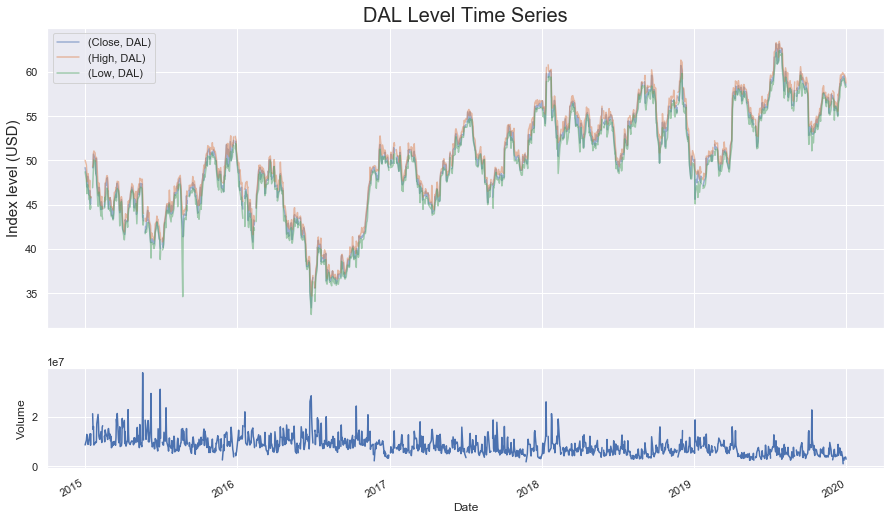

In [5]:
plot_stock_data("DAL")

In [6]:
#To better visualize the data and each stock, we define a function o simplify this process

def plot_mfg_stock_data(ticker_sym):
    """
    Plots the "Close", "High" and "Low" stock price fot a company given its ticker symbol
    Plot the "Volume" traded as a subplot
    """
    #Attributes to plot
    attributes_list = manufacturers_stock_data.columns.get_level_values(0).unique().drop(["Volume", "Adj Close", "Open"])

    #Initialize figure and axes for plot
    fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={"height_ratios":[3,1]}, figsize=(15,9))
    ax1.set_ylabel("Index level (USD)", fontsize=15)
    ax1.grid(True)
    ax1.set_xticklabels([])
    ax1.set_title(ticker_sym + " Level Time Series", fontsize = 20)
    ax1_label = ax1.set_xlabel("")
    ax1_label.set_visible(False)
    ax2.set_ylabel("Volume")
    
    #Plot attribute list
    for ind in attributes_list:
        manufacturers_stock_data[ind,ticker_sym].plot(alpha=0.5, ax=ax1)
        ax1.legend()
    
    #Plot stock volume traded
    manufacturers_stock_data["Volume", ticker_sym].plot(ax=ax2)
    #plt.savefig(ticker_sym+"_level_time_series.jpg", dpi=150)

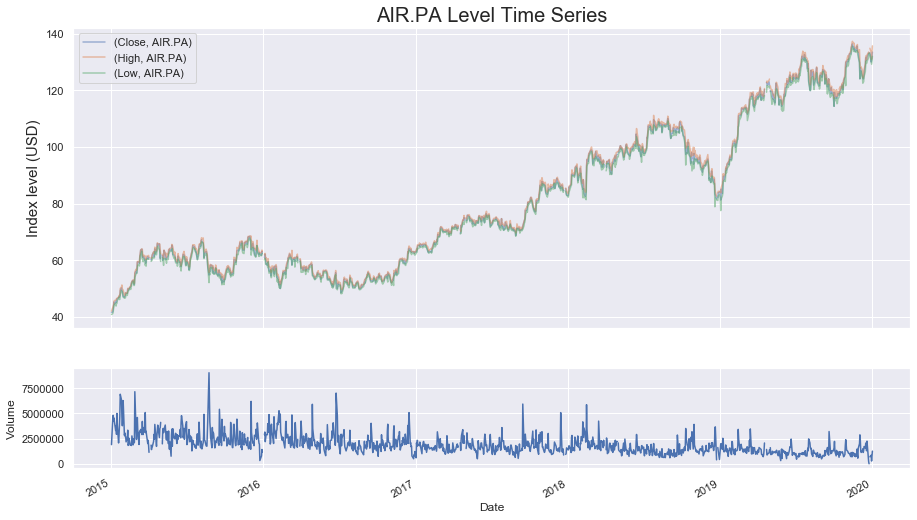

In [7]:
plot_mfg_stock_data("AIR.PA")

The following plots shows the elements of each group at the same time. This help us to compare how the stock values have changed through time.
These plots show how much is the stock value, there are higher prices, but this does not show how good a stock perform. 

 

Text(0, 0.5, 'Price (USD)')

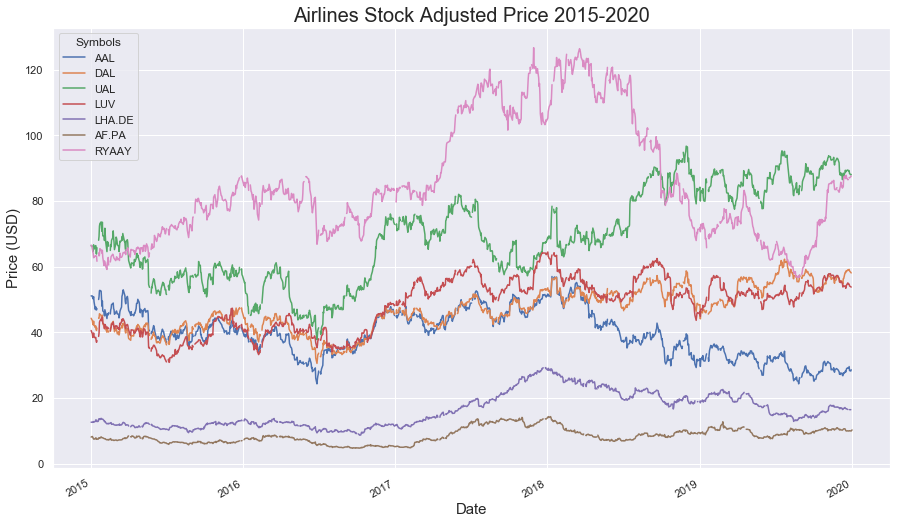

In [8]:
#Plot Adj Close value for all tickers on the same figure
airlines_stock_data["Adj Close"].plot(figsize=(15,9))
plt.title("Airlines Stock Adjusted Price 2015-2020", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Price (USD)",fontsize=15)
#plt.savefig("Airlines_AdjClose.png", dpi=150)

At this moment, without further analysis, is clear to see that stocks as UAL, LUV, DAL and AAL have similar behavior. The same happens to LHA.DE and AF.PA. This may occur because they belong to the same continent.

Text(0, 0.5, 'Price USD')

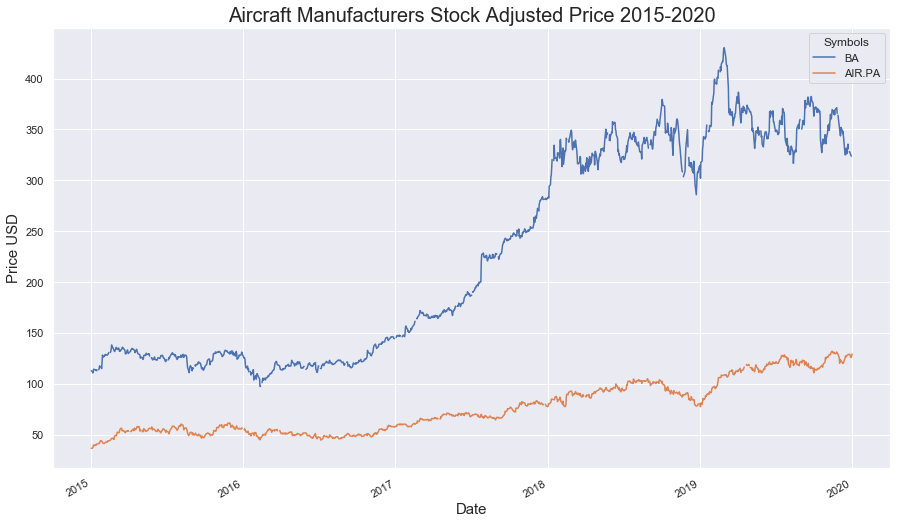

In [9]:
#Plot Adj Close value for all tickers on the same figure
manufacturers_stock_data["Adj Close"].plot(figsize=(15,9))
plt.title("Aircraft Manufacturers Stock Adjusted Price 2015-2020", fontsize=20)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price USD", fontsize=15)
#plt.savefig("Mfg_AdjClose.png", dpi=150)

**Normalize the time series**

A financial time series is normalized to observe how an investment of x amount changes with time. It is useful for comparing the performance of multiple time series.

Normalization is done by using the formula given below:

$\frac{p(t)}{p(0)}*x$ for 0<= t <= T where T is period end date

The code given below normalizes and plots the data

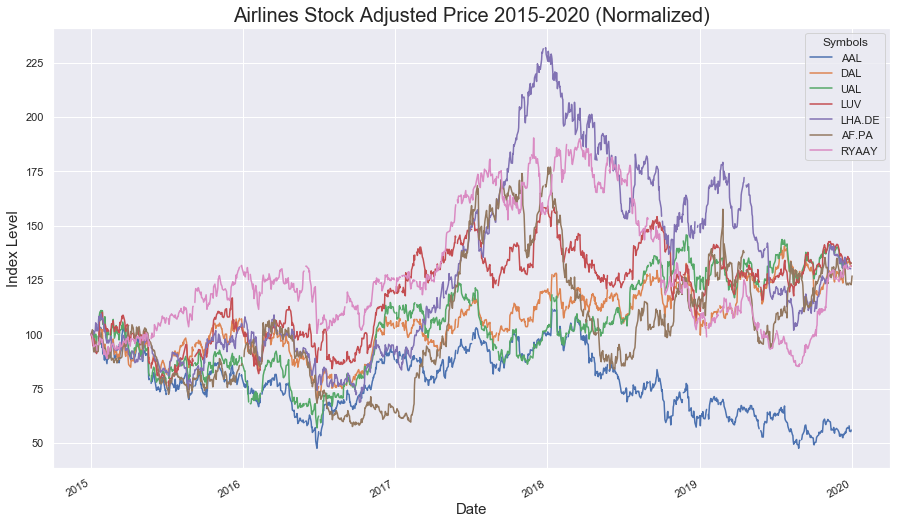

In [10]:
#Plot normalize data for all tickers
norm_airlines_stock_data = airlines_stock_data["Adj Close"]/airlines_stock_data["Adj Close"].iloc[0,:]*100
norm_airlines_stock_data.plot(figsize=(15,9))

#Plot formatting
plt.title("Airlines Stock Adjusted Price 2015-2020 (Normalized)", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Index Level",fontsize=15);
#plt.savefig("Air_Norm_AdjClose.png", dpi=150)

From this plot we can say the following
*   Between 2016 and 2017 companies performed the worst
*   LHA.DE had the best performance in late 2017
*   In 2020 the majority of companies have performed similar, exception is AAL with the worst performance


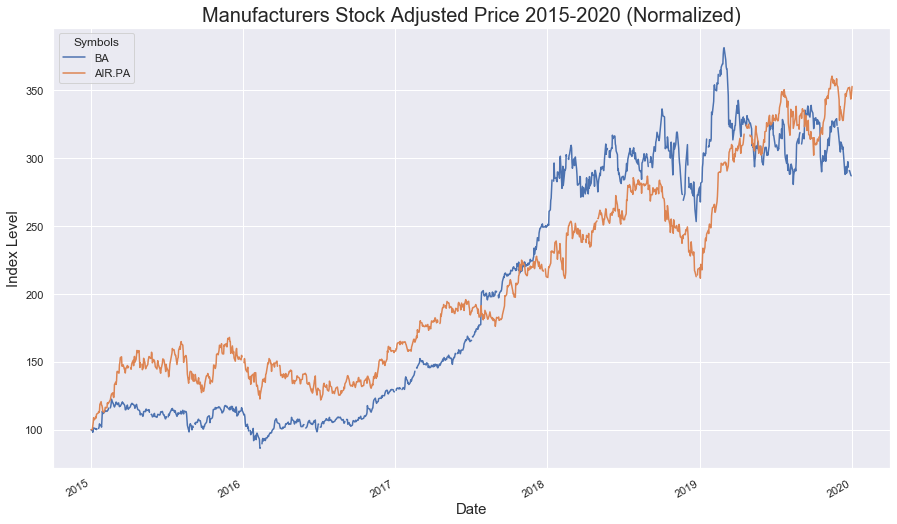

In [11]:
#Plot normalize data for all tickers
norm_manufacturers_stock_data = manufacturers_stock_data["Adj Close"]/manufacturers_stock_data["Adj Close"].iloc[0,:]*100
norm_manufacturers_stock_data.plot(figsize=(15,9))

#Plot formatting
plt.title("Manufacturers Stock Adjusted Price 2015-2020 (Normalized)", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Index Level",fontsize=15);
#plt.savefig("Mfg_Norm_AdjClose.png", dpi=150)

On the firs plot for the manufacturers stocks is easy to see that Boeing (BA) has a higher stock value than Airbus (AIR.PA), it may seem it is better to invest on Boeing.
However, the normalized plot shows airbus have a better performance. 

C:\Users\Aldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


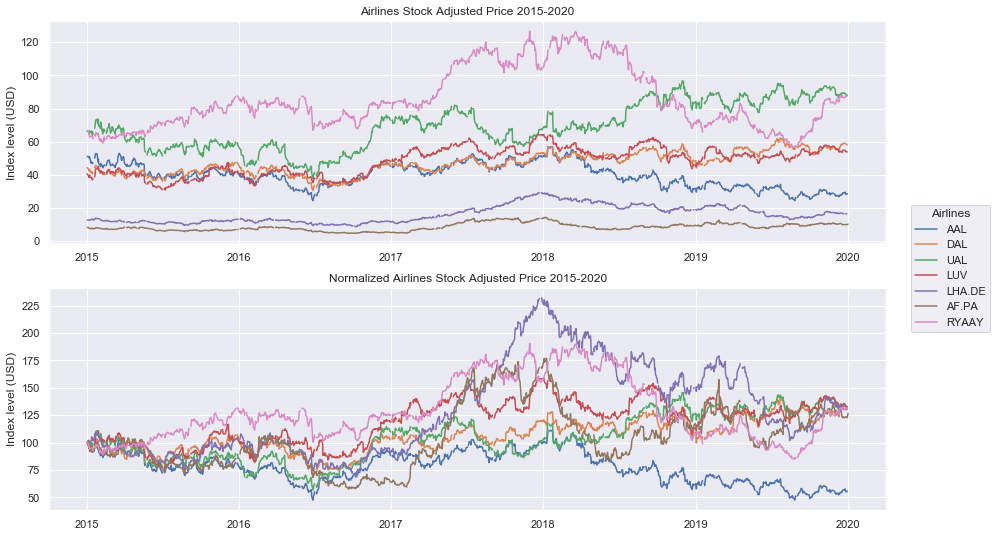

In [12]:
#Set figure and axes to plot regular and normalized data
fig, (ax1, ax2) =plt.subplots(nrows=2, ncols=1, figsize=(15,9))
airlines_labels = airlines_stock_data.columns.get_level_values(1).unique()

fig.legend(ax1.plot(airlines_stock_data["Adj Close"]),
           labels=airlines_labels,
           loc="center right",
           title = "Airlines")

ax1.set_title("Airlines Stock Adjusted Price 2015-2020")
ax1.set_ylabel("Index level (USD)")
ax2.set_title("Normalized Airlines Stock Adjusted Price 2015-2020")
ax2.set_ylabel("Index level (USD)")

ax2.plot((norm_airlines_stock_data));
#plt.savefig("Airlines_norm_comp.png", dpi=150)

C:\Users\Aldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


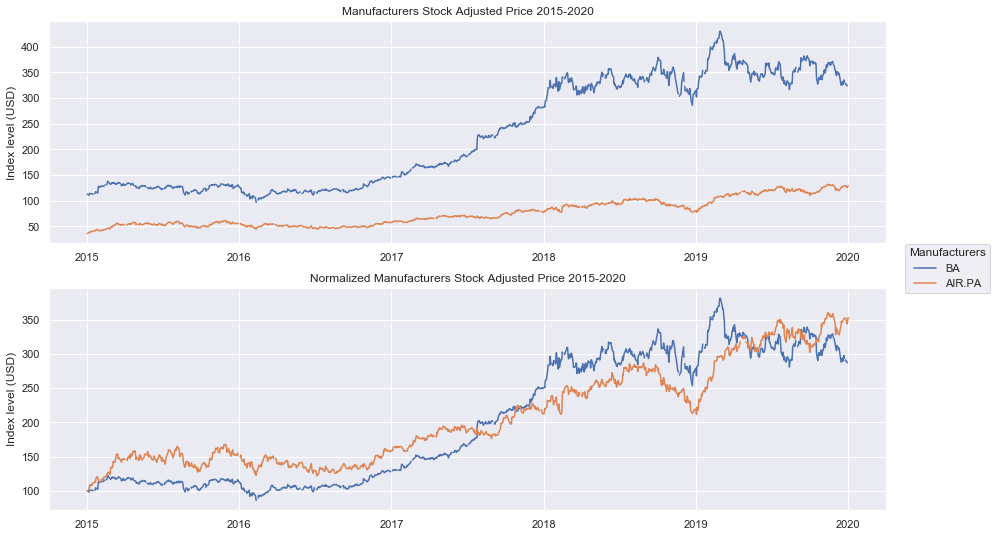

In [13]:
#Set figure and axes to plot regular and normalized data
fig, (ax1, ax2) =plt.subplots(nrows=2, ncols=1, figsize=(15,9))
manufacturers_labels = manufacturers_stock_data.columns.get_level_values(1).unique()

fig.legend(ax1.plot(manufacturers_stock_data["Adj Close"]),
           labels=manufacturers_labels,
           loc="center right",
           title = "Manufacturers")

ax1.set_title("Manufacturers Stock Adjusted Price 2015-2020")
ax1.set_ylabel("Index level (USD)")
ax2.set_title("Normalized Manufacturers Stock Adjusted Price 2015-2020")
ax2.set_ylabel("Index level (USD)")

ax2.plot((norm_manufacturers_stock_data));
#plt.savefig("Mfgs_norm_comp.png", dpi=150)

To better compare the normalized and non-normalized information, we plot the both cases in one figure. 

## 3. Returns Calculation

The return of a financial instrument is the profit/loss incurred on an investment over a period of time, expressed as a proportion of the original investment. It gives a complete, scale-free summary of the investment opportunity.
The simple single period return of financial instrument is calculated using the formula given below



R(t)=P(f)P(i)−1where P(i) and P(f) are the prices at the starting time point and ending time point of the period

**Simple Daily Return**

he daily return is the day over day return.

The underlying formula for calculating simple daily return is

$R(t)=\frac{P(t)}{P(t−1)}−1$ for 0<=t<=T


The code given below calculates the daily returns using the pandas dataframe function pct_change. We also calculated the mean daily simple return, which comes out to be close to zero. This tells the importance of compounding effect.
The return series hence obtained is first plotted as a line chart and then as a histogram to observe its underlying distribution. From histogram we can observe that return distribution is bell shaped and similar to famous normal distribution.

In [14]:
def dailyreturns_airlines_plot(ticker):
    """
    Plots the daily return information for a given ticker. 
    Plots the return distribuition for a ticker
    """
    daily_returns = airlines_stock_data["Adj Close", ticker].pct_change()
    print(ticker + " Avg daily return is {:.4f}%".format(daily_returns.mean()*100))
    
    #Set figure and axes
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
    daily_returns.plot(ax=ax1)
    daily_returns.plot(kind="hist",ax=ax2, bins=30)
    
    #Set labels and titles
    fontsize_label = 15 
    fontsize_title = 20
    ax1.set_xlabel("Date", fontsize=fontsize_label)
    ax1.set_ylabel("Index daily returns", fontsize=fontsize_label)
    ax1.set_title(ticker + " Return time series", fontsize=fontsize_title)
    ax2.set_ylabel("Frequency", fontsize=fontsize_label)
    ax2.set_title(ticker + " Daily return distribution", fontsize=fontsize_title)
    
    #plt.savefig(ticker+"_Daily_return.png", dpi=150)

DAL Avg daily return is 0.0358%


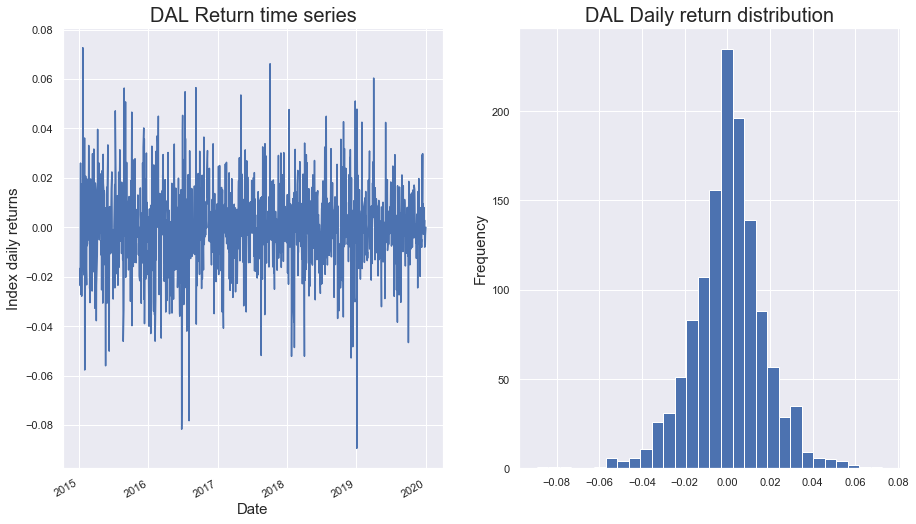

In [15]:
dailyreturns_airlines_plot("DAL")

In [16]:
def dailyreturns_mfg_plot(ticker):
    """
    Plots the daily return information for a given ticker. 
    Plots the return distribuition for a ticker
    """
    daily_returns = manufacturers_stock_data["Adj Close", ticker].pct_change()
    print(ticker + " Avg daily return is {:.4f}%".format(daily_returns.mean()*100))
    
    #Set figure and axes
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
    daily_returns.plot(ax=ax1)
    daily_returns.plot(kind="hist",ax=ax2, bins=30)
    
    #Set labels and titles
    fontsize_label = 15 
    fontsize_title = 20
    ax1.set_xlabel("Date", fontsize=fontsize_label)
    ax1.set_ylabel("Index daily returns", fontsize=fontsize_label)
    ax1.set_title(ticker + " Return time series", fontsize=fontsize_title)
    ax2.set_ylabel("Frequency", fontsize=fontsize_label)
    ax2.set_title(ticker + " Daily return distribution", fontsize=fontsize_title)
    
    #plt.savefig(ticker+"_Daily_return.png", dpi=150)

AIR.PA Avg daily return is 0.1116%


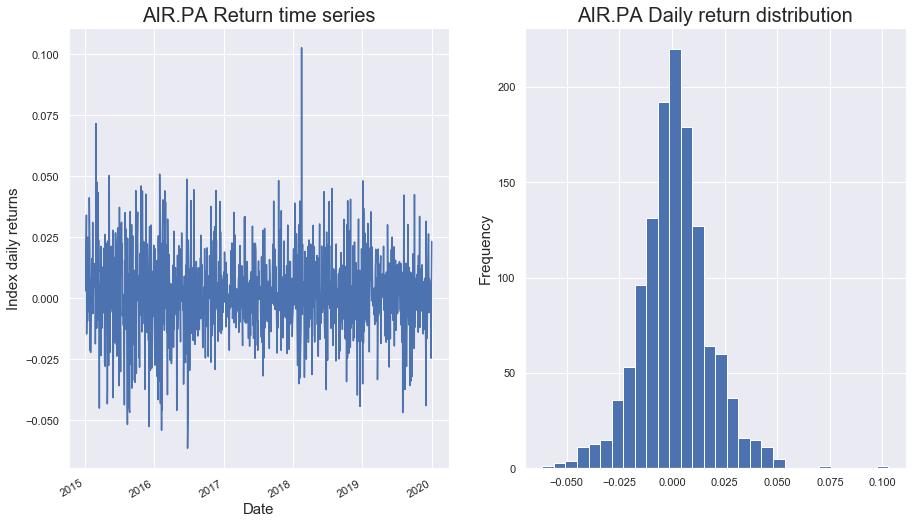

In [17]:
dailyreturns_mfg_plot("AIR.PA")

**Logarithmic Return / Continuously Compounded Return**

The logarithmic return or continuously compounded return, D(t), is calculated using the formula

$D(t)=log(\frac{P(f)}{P(i)})$ where P(i) and P(f) are the initial and the final prices of the instrumentD(t)=log(R(t)+1)where R(t) is the simple return during the period

he advantages of using log returns over simple returns are as follows:

The logarithmic returns are symmetric in nature, as opposed to simple returns.
In case the prices are distributed log-normally, log(1+R(t)) is distributed normally.
The log returns are additive in nature.
The code given below calculates the log returns using the log function from the numpy library. Instead of calculating log returns from scratch, we have used simple returns timeseries to calculate log returns.

The returns hence obtained are plotted as a histogram to observe the distribution of these returns. As we can observe the log returns distribution is also bell shaped and similar to normal distibution.

In [18]:
def log_dailyreturns_airlines_plot(ticker):
    """
    Compute and plot the logarithmic return for a given ticker
    """  
    #Prepare Data
    daily_returns = airlines_stock_data["Adj Close", ticker].pct_change()
    log_returns = np.log(daily_returns+1)
    #Plot data
    plt.figure(figsize=(15,9))
    log_returns.plot(kind="hist", bins=30)
    plt.ylabel("Frequency", fontsize=15)
    plt.title(ticker + " Daily log return distribution", fontsize=20)
    
    #plt.savefig(ticker + " log_return.png")

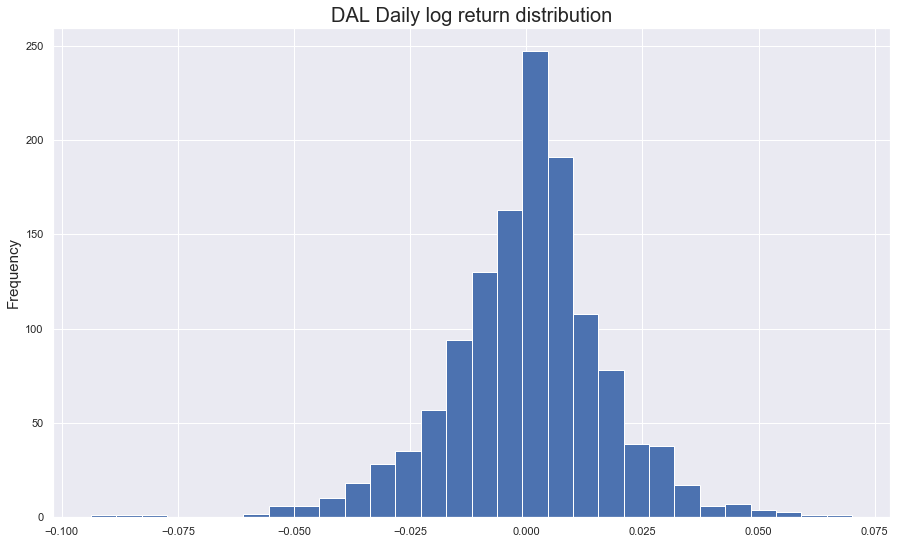

In [19]:
log_dailyreturns_airlines_plot("DAL")

In [20]:
def log_dailyreturns_mfg_plot(ticker):
    """
    Compute and plot the logarithmic return for a given ticker
    """  
    #Prepare Data
    daily_returns = manufacturers_stock_data["Adj Close", ticker].pct_change()
    log_returns = np.log(daily_returns+1)
    #Plot data
    plt.figure(figsize=(15,9))
    log_returns.plot(kind="hist", bins=30)
    plt.ylabel("Frequency", fontsize=15)
    plt.title(ticker + " Daily log return distribution", fontsize=20)
    
    #plt.savefig(ticker + " log_return.png")

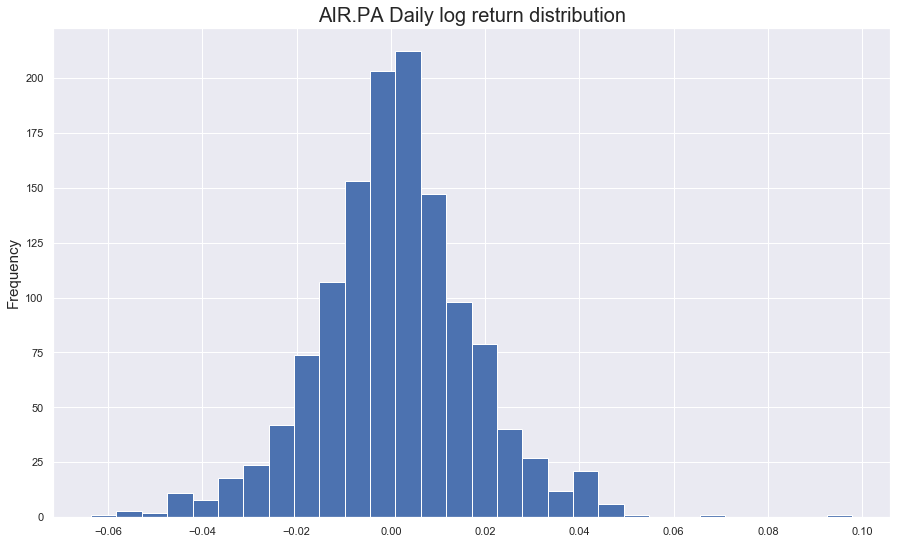

In [21]:
log_dailyreturns_mfg_plot("AIR.PA")

**Compound Annual Growth Rate (CAGR)**

The Compound Annual Growth Rate (CAGR) is the mean annual growth rate of an investment over a specified period of time longer than one year. It describes the rate at which an investment would have grown, if it had grown at a steady rate, which doesn't ususally happen in reality. CAGR can be essentially viewed as a way to smooth out an investment’s returns so that they may be more easily understood.

The formula for calculating CAGR is

$R(t)=(\frac{P(f)}{P(i)})^{\frac{1}{n}}−1$ where P(f) and P(i) are the final and the initial values for a period and n is the time in years

CAGR is a relatively simple metric and hence has a variety of uses.

1. CAGR can be used to calculate the average growth of a single investment
2. It can be used to compare investments of different types with one another. For example it can be used to compare an investment in risk free instrument with an investment in a portfolio with varying growth rate
3. It can also be used to track the performance of various business measures of one or multiple companies alongside one another

The code given below illustrates how CAGR can be calculated.

In [22]:
#Initialize empty DataFrame
airlines_cagr=[]

#Calculate CAGR for each ticker
for ticker in airlines:
    years = (airlines_stock_data.index[-1]-airlines_stock_data.index[0]).days/365
    cagr = (airlines_stock_data["Adj Close", ticker][-1]/airlines_stock_data["Adj Close", ticker][0])**(1/years)-1
    airlines_cagr.append(cagr*100)
    

#Append each ticker information
airline_cagr_df = pd.DataFrame(airlines_cagr,index=airlines, columns=["CAGR (%)"])
airline_cagr_df


,CAGR (%)
AAL,NaN
DAL,NaN
UAL,NaN
LUV,NaN
LHA.DE,5.752574
AF.PA,4.867385
RYAAY,NaN


In [23]:
#Initialize empty DataFrame
manufacturers_cagr=[]

#Calculate CAGR for each ticker
for manufacturer in manufacturers:
    years = (manufacturers_stock_data.index[-1]-manufacturers_stock_data.index[0]).days/365
    cagr = (manufacturers_stock_data["Adj Close", manufacturer][-1]/manufacturers_stock_data["Adj Close", manufacturer][0])**(1/years)-1
    manufacturers_cagr.append(cagr*100)
    #Append each ticker information
    
manufacturer_cagr_df = pd.DataFrame(manufacturers_cagr,index=manufacturers, columns=["CAGR (%)"])
manufacturer_cagr_df

,CAGR (%)
BA,NaN
AIR.PA,28.673741


## 4. Volatility Calculation

**Annualized Volatility**

Annualised volatility is the degree of variation observed in the prices of a financial instrument over a period of one year. It can be calculated by scaling the daily volatility, which is measured as the standard deviation of the returns of the stock prices, to 1 year. The daily volatility can be scaled to annual by simply multiplying with  sqrt(252)  (considering that there are 252 business days in a year) in case it is calculated as the standard deviation of the log returns.

The code below calculates annualised volatility by calculating the standar deviation of log return for each ticker. The result is appened to the CAGR dataframe

In [24]:
#Initialize empty DataFrame
airlines_log_returns = []
volatility_airlines = []

#Calculate volatility for each ticker
for ticker in airlines:
    airlines_daily_returns = airlines_stock_data["Adj Close", ticker].pct_change()
    airlines_log_returns = np.log(airlines_daily_returns+1)
    volatility = airlines_log_returns.std()*(252**.05)
    volatility_airlines.append(volatility*100)

#Append each ticker information
airline_cagr_df["Volatility (%)"] = volatility_airlines
airline_cagr_df

,CAGR (%),Volatility (%)
AAL,NaN,2.944642
DAL,NaN,2.272136
UAL,NaN,2.656859
LUV,NaN,2.284426
LHA.DE,5.752574,2.542071
AF.PA,4.867385,3.045020
RYAAY,NaN,2.231649


In [25]:
#Initialize empty DataFrame
manufacturers_log_returns = []
volatility_manufacturers = []

#Calculate volatility for each ticker
for ticker in manufacturers:
    mfg_daily_returns = manufacturers_stock_data["Adj Close", ticker].pct_change()
    manufacturers_log_returns = np.log(mfg_daily_returns+1)
    volatility = manufacturers_log_returns.std()*(252**.05)
    volatility_manufacturers.append(volatility*100)
  #Append each ticker information
manufacturer_cagr_df["Volatility (%)"] = volatility_manufacturers
manufacturer_cagr_df

,CAGR (%),Volatility (%)
BA,NaN,2.071436
AIR.PA,28.673741,2.194027


**N-days Rolling Volatility**

N-days rolling volatility is calculated by rolling the dates for a window of N days and using the corresponding data for calculating the volatility.

The series of rolling volatility hence obtained is plotted on the secondary y-axis, along with index levels plotted on the primary y-axis.

In [26]:
def airline_rol_vol(ticker):
    """
    Compute and plot the rolling volatility for a given ticker in the same figure as the Adjusted Close index
    """
    
    #Calculate rolling volatility
    daily_returns = airlines_stock_data["Adj Close", ticker].pct_change()
    log_returns = np.log(daily_returns+1)
    rolling_vol = log_returns.rolling(window=252).std()*(252**0.5)*100
    
    #Plot ticker Adj Close level
    airlines_stock_data["Adj Close", ticker].plot(label="Index Levels", figsize=(15,9), color="Blue")
    
    #Set figure
    plt.title(ticker + " Levels and 252 days Rolling Volatility", fontsize=20)
    plt.ylabel("Index Levels", fontsize=15)
    plt.legend(loc=2)
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylim(ymax=50)

    #Plot rolling volatility
    rolling_vol.plot(color="Salmon", label="Volatility")
    plt.ylabel("Volatility %")
    plt.legend(loc=1)
    
    #plt.savefig(ticker+"_volatility.png", pdi=150)

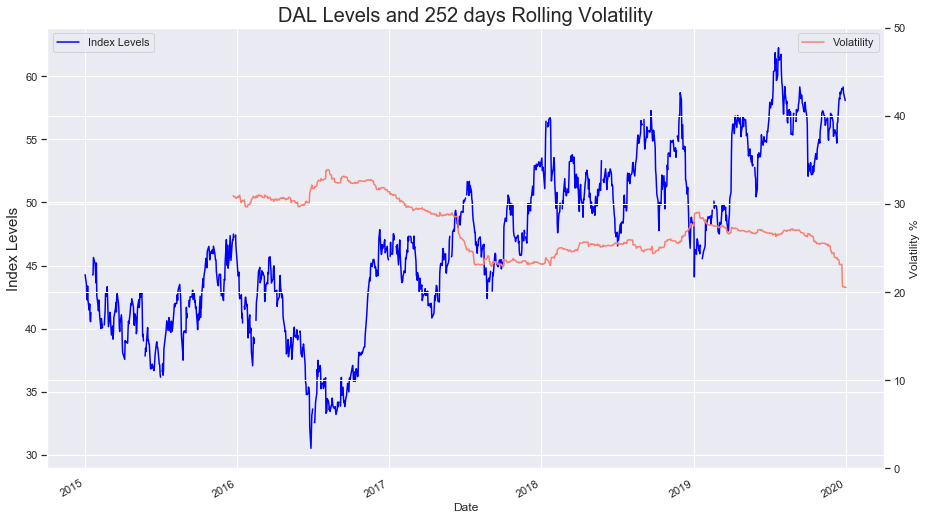

In [27]:
airline_rol_vol("DAL")

In [28]:
def mfg_rol_vol(ticker):
    """
    Compute and plot the rolling volatility for a given ticker in the same figure as the Adjusted Close index
    """
    
    #Calculate rolling volatility
    daily_returns = manufacturers_stock_data["Adj Close", ticker].pct_change()
    log_returns = np.log(daily_returns+1)
    rolling_vol = log_returns.rolling(window=252).std()*(252**0.5)*100
    
    #Plot ticker Adj Close level
    manufacturers_stock_data["Adj Close", ticker].plot(label="Index Levels", figsize=(15,9), color="Blue")
    
    #Set figure
    plt.title(ticker + " Levels and 252 days Rolling Volatility", fontsize=20)
    plt.ylabel("Index Levels", fontsize=15)
    plt.legend(loc=2)
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylim(ymax=50)

    #Plot rolling volatility
    rolling_vol.plot(color="Salmon", label="Volatility")
    plt.ylabel("Volatility %")
    plt.legend(loc=1)
    
    #plt.savefig(ticker+"_volatility.png", pdi=150)

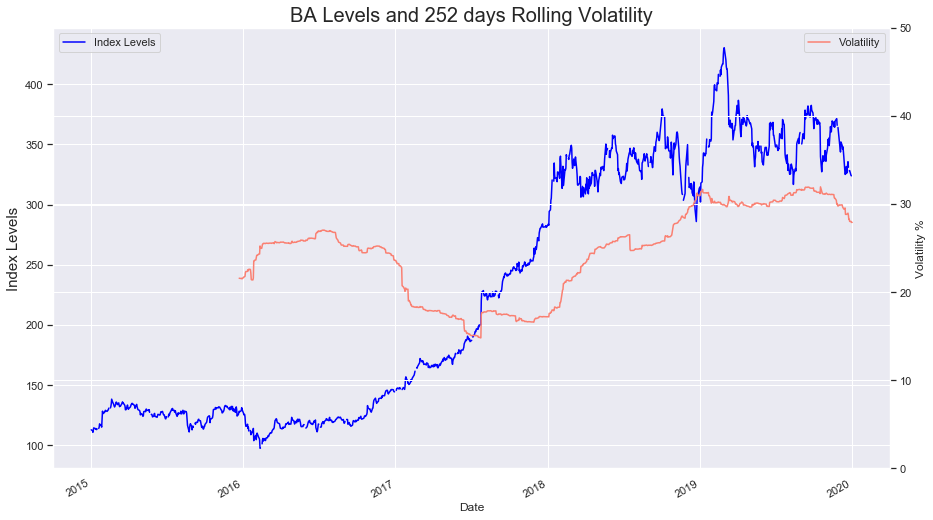

In [29]:
mfg_rol_vol("BA")

## 5. Correlation calculation



According to Investopedia, correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other.

Correlation measures association, thus we can determine whethet two tickers move in relation to each other. It does not show if X causes Y or vice versa.  

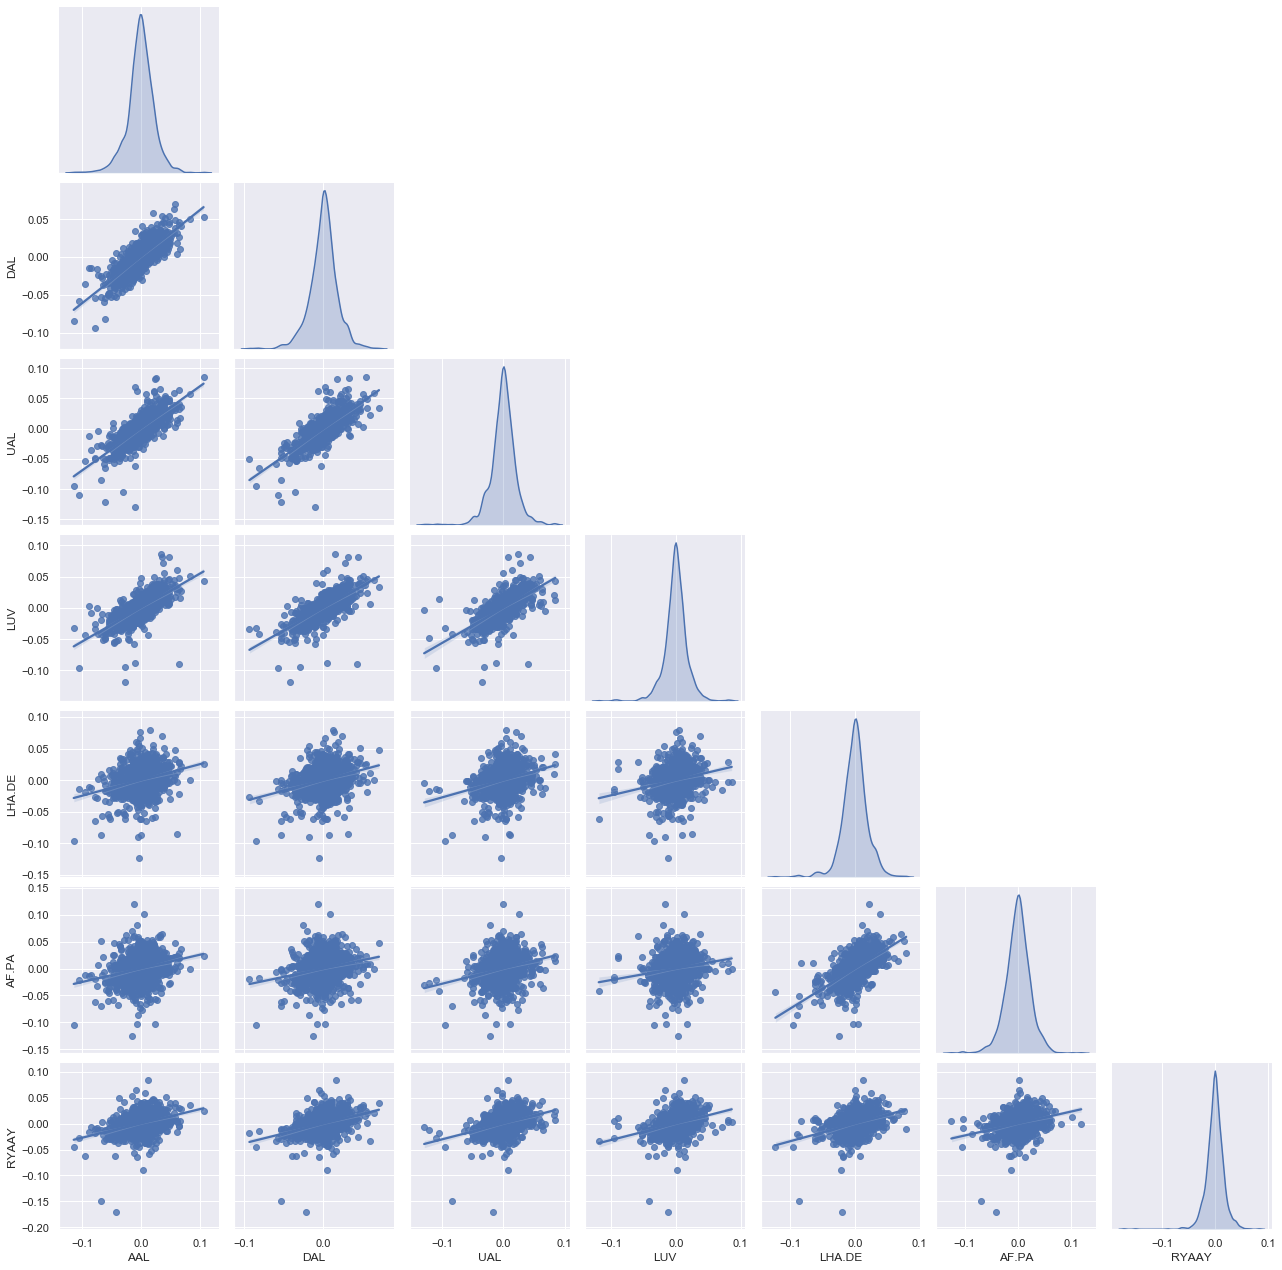

In [30]:
log_returns = np.log(norm_airlines_stock_data.pct_change().dropna()+1)

#Plot correlation measures and a tendency line 
sns.pairplot(log_returns, kind="reg",diag_kind="kde", corner=True)
#plt.savefig("Airlines_correlation.png", pdi=150)

The plot above shows some linear relationship among the tickers. It may not be so clear in some cases, in this situation a heatmap becomes handy. 

A heatmap is a graphical representation of matrix data where the individual values contained are represented as colors.

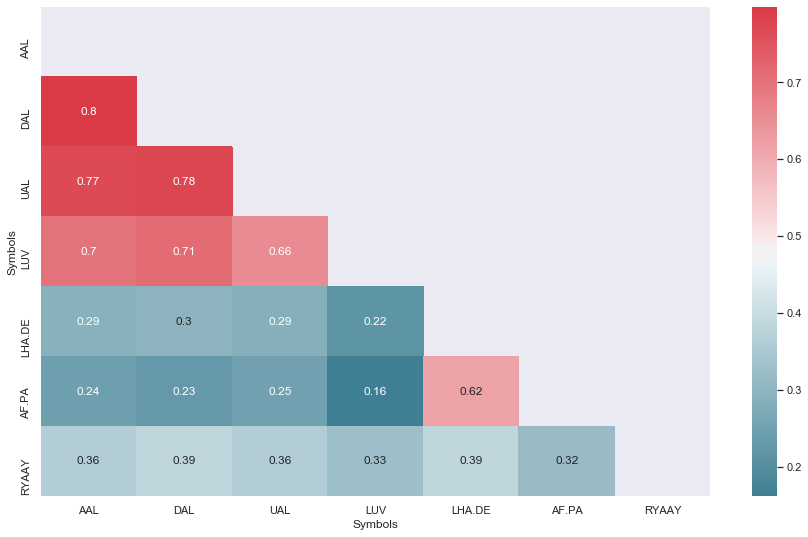

In [31]:
# Create correlation matrix
airlines_corr = log_returns.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(airlines_corr, dtype=np.bool))

#Set up matplotlib figure
fig, ax = plt.subplots(figsize=(15,9))

#Generate a custom diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Drown heatmap
sns.heatmap(airlines_corr, mask=mask, cmap=cmap, annot=True)
#plt.savefig("Airlines_heatmap.png", pdi=150)

In the heatmap is easier to identify the tickers which are correlated. We can see DAL, UAL and LUV are strongly correlated, the three airlines are from USA. 
The same occurs with LHA.DE and AF.PA, they belong to Europe. 
We can suggest the correlation heavily depends on the geogaphric location. 

## 6. Return Distribution Analysis

**Quantile-Quantile Plot (Q-Q Plot)**
The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution, such as Normal, Exponential,etc. It is created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. Normal q-q plot is used more frequently in practice due to so many statistical methods assuming normality. For creating the plot, the quantile of our sample data is plotted against the quantile calculated from a theoretical distribution. A 45-degree reference line is also plotted to see the alignment.

The normal q-q plot for sample data belonging to a skewed distribution will form a curve instead of a straight line. On the other hand, the normal q-q plot for a distribution with heavy tails will have points fall along a line in the middle of the graph, but curved off in the extremities.

In [32]:
def Q_Q_plot(ticker):
    """
    Quantile-Quantile plot for a given ticker
    """
    
    daily_returns = airlines_stock_data["Adj Close", ticker].pct_change()
    log_returns = np.log(daily_returns+1)
    z = (log_returns[1:]-np.mean(log_returns[1:]))/np.std(log_returns[1:])
    plt.figure(figsize=(15,9))
    stats.probplot(z, dist="norm", plot=plt)
    plt.title(ticker + " Normal Q-Q plot", fontsize=20)
    
    #plt.savefig(ticker+"_QQ_plot.png", dpi=150)

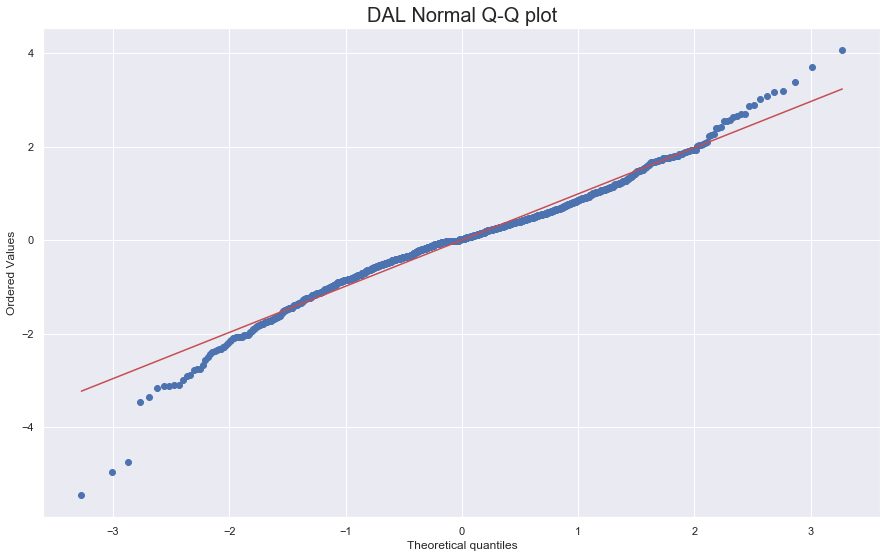

In [33]:
Q_Q_plot("DAL")

In [34]:
def Q_Q_plot_mfg(ticker):
    """
    Quantile-Quantile plot for a given ticker
    """
    
    daily_returns = manufacturers_stock_data["Adj Close", ticker].pct_change()
    log_returns = np.log(daily_returns+1)
    z = (log_returns[1:]-np.mean(log_returns[1:]))/np.std(log_returns[1:])
    plt.figure(figsize=(15,9))
    stats.probplot(z, dist="norm", plot=plt)
    plt.title(ticker + " Normal Q-Q plot", fontsize=20)
    
    #plt.savefig(ticker+"_QQ_plot.png", dpi=150)

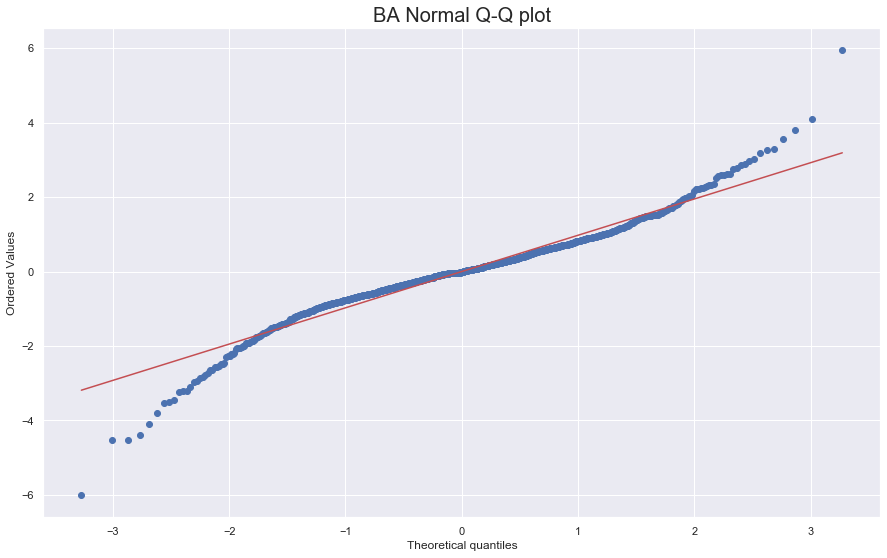

In [35]:
Q_Q_plot_mfg("BA")

**Kurtosis and Skewness**

**Kurtosis** — Kurtosis is a measure of the combined weight of a distribution's tails relative to the center of the distribution. It esssentially tells us whether the data is heavy-tailed or light-tailed relative to a normal distribution. The kurtosis of any univariate normal distribution is 3. Distributions with kurtosis less than 3 are said to be platykurtic, while those with kurtosis greater than 3 are said to be leptokurtic. In python, the kurtosis can be calculated using the kurtosis function of pandas. This, however, calculates the excess Kurtosis(Kurtosis expressed as above or below 3), as it assumes the Fisher's definition of Kurtosis, whereby Kurtosis of Normal distribution is equal to 0.

**Skewness** — Skewness is a measure of symmetricity of the distribution and can be mathematically defined as the averaged cubed deviation from the mean divided by the standard deviation cubed. If the result of the computation is greater than zero, the distribution is positively skewed. If it's less than zero, it's negatively skewed. If equal to zero, it's roughly symmetric. Normal distrbution has a skewness measure of zero. The funtion skew of pandas can be used to calculate the skewness of a distribution.

In [36]:
#Initialize empty DataFrame
airline_kurtosis = []
airline_skew = []

#Calculate Kurtosis and Skewness for each ticker
for ticker in airlines:
    airlines_daily_returns = airlines_stock_data["Adj Close", ticker].pct_change()
    airlines_log_returns = np.log(airlines_daily_returns+1)
    kurtosis_air = airlines_log_returns.kurtosis()
    airline_kurtosis.append(kurtosis_air)
    skew_air =  airlines_log_returns.skew()
    airline_skew.append(skew_air)
    
#Append each ticker information
airline_cagr_df["Kurtosis"] = airline_kurtosis
airline_cagr_df["Skewness"] = airline_skew

airline_cagr_df


,CAGR (%),Volatility (%),Kurtosis,Skewness
AAL,NaN,2.944642,2.315173,-0.359265
DAL,NaN,2.272136,2.357371,-0.335292
UAL,NaN,2.656859,4.741889,-0.548373
LUV,NaN,2.284426,5.499714,-0.488703
LHA.DE,5.752574,2.542071,3.742537,-0.517911
AF.PA,4.867385,3.045020,2.467024,-0.252581
RYAAY,NaN,2.231649,14.187204,-1.390043


In [37]:
#Initialize empty DataFrame
mfg_kurtosis = []
mfg_skew = []

#Calculate Kurtosis and Skewness for each ticker
for ticker in manufacturers:
    mfg_daily_returns = manufacturers_stock_data["Adj Close", ticker].pct_change()
    mfg_log_returns = np.log(mfg_daily_returns+1)
    kurtosis_mfg = mfg_log_returns.kurtosis()
    mfg_kurtosis.append(kurtosis_mfg)
    skew_mfg = mfg_log_returns.skew()
    mfg_skew.append(skew_mfg)

#Append each ticker information
manufacturer_cagr_df["Kurtosis"] = mfg_kurtosis
manufacturer_cagr_df["Skewness"] = mfg_skew

manufacturer_cagr_df

,CAGR (%),Volatility (%),Kurtosis,Skewness
BA,NaN,2.071436,4.137018,-0.264464
AIR.PA,28.673741,2.194027,1.692516,0.090038


## 7. Heatmap and Seasonality

**Monthly Returns as a Heatmap**

The code given below plots the monthly returns against their respective years in the form of a heatmap. It is done by first resampling the daily data as monthly, by taking the last published value of the month. Using these end of month levels, we calculate the monthly return, which is then grouped by 'Year' and 'Month'. The matrix hence obtained is plotted as a heatmap using the function heatmap of the library seaborn.

In [38]:
def airline_monthly_return_plot(ticker):
    """
    Compute and plot a heatmap with the monthly return for a given ticker
    """
    #Calculate monthly return 
    monthly_returns = pd.DataFrame(airlines_stock_data["Adj Close",ticker].resample("M").last())
    monthly_returns["Monthly Returns"] = monthly_returns.pct_change()
    monthly_returns["Month"] = monthly_returns.index.month
    monthly_returns["Year"] = monthly_returns.index.year
    airlines_mr_df = monthly_returns.groupby(["Year","Month"], sort=False)["Monthly Returns"].last()
    airlines_mr_df = airlines_mr_df.unstack(level=0)
    
    #Set figure
    plt.figure(figsize=(15,9))
    sns.heatmap(airlines_mr_df, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
    plt.title(ticker +" Monthly Return Plot", fontsize=20)
    plt.ylabel("Month",fontsize=15)
    plt.xlabel("Year",fontsize=15)
    
    #plt.savefig(ticker+"_monthly_heatmap.png", dpi=150)

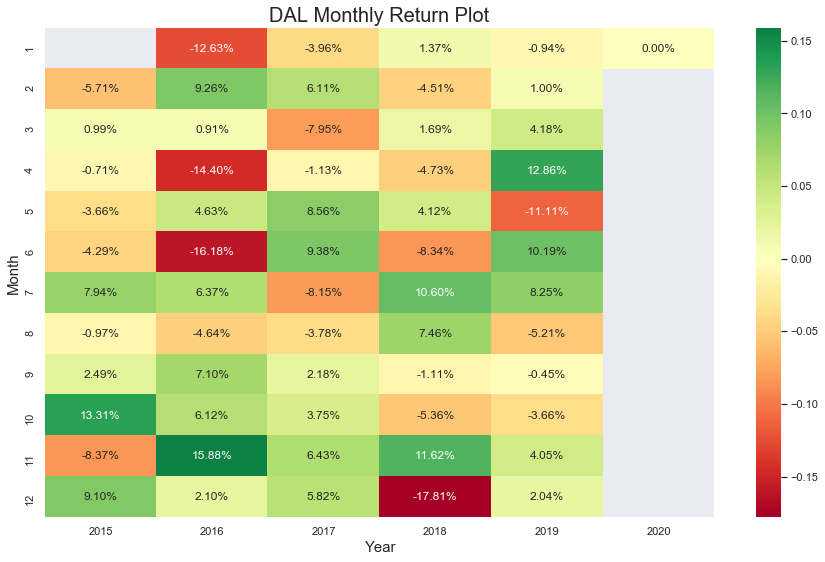

In [39]:
airline_monthly_return_plot("DAL")

In [40]:
def mfg_monthly_return_plot(ticker):
    """
    Compute and plot a heatmap with the monthly return for a given ticker
    """
    #Calculate monthly return 
    monthly_returns = pd.DataFrame(manufacturers_stock_data["Adj Close",ticker].resample("M").last())
    monthly_returns["Monthly Returns"] = monthly_returns.pct_change()
    monthly_returns["Month"] = monthly_returns.index.month
    monthly_returns["Year"] = monthly_returns.index.year
    manufacturers_mr_df = monthly_returns.groupby(["Year","Month"], sort=False)["Monthly Returns"].last()
    manufacturers_mr_df = manufacturers_mr_df.unstack(level=0)
    
    #Set figure
    plt.figure(figsize=(15,9))
    sns.heatmap(manufacturers_mr_df, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
    plt.title(ticker +" Monthly Return Plot", fontsize=20)
    plt.ylabel("Month",fontsize=15)
    plt.xlabel("Year",fontsize=15)
    
    #plt.savefig(ticker+"_monthly_heatmap.png", dpi=150)

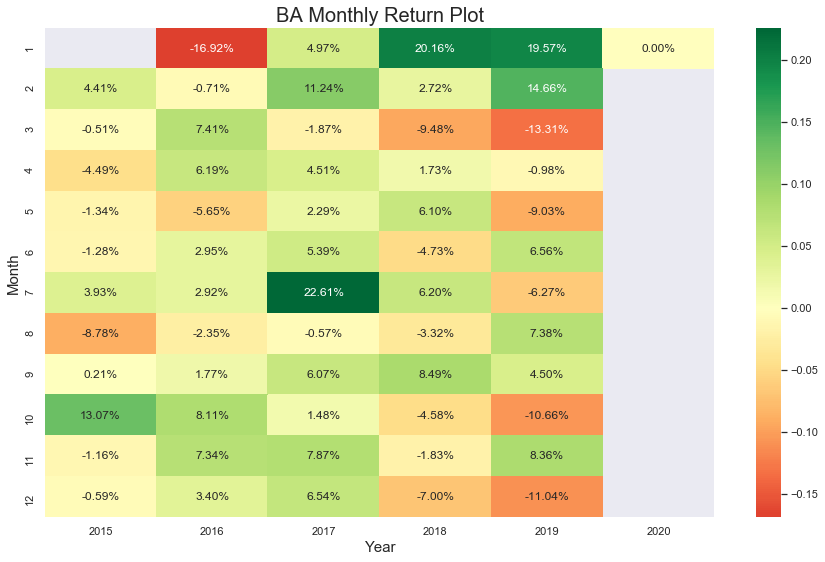

In [41]:
mfg_monthly_return_plot("BA")

## 8. Drawdown Analysis

A drawdown is the peak-to-trough decline during a specific recorded period of an investment, fund or commodity security. It is usually quoted as the percentage between the peak and the subsequent trough and it respresents the downside risk. Drawdowns help determine an investment's financial risk by evaluating recovery-period, which is the time taken for the investment to recover from a decline in its net asset value back to the peak.

In [42]:
def drawdown_stock(ticker):
    """
    Compute and calculate the max drawdown and recovery window for a given stock
    """
    #Calculate drawdown and recovey window
    xs = airlines_stock_data["Adj Close", ticker].fillna(method="backfill")
    i = np.argmax(np.maximum.accumulate(xs)-xs)
    j = np.argmax(xs[:i])
    recovery = xs[i:][xs[i:]>xs[j]].index[0]

    #Calculate drawdown porcentage
    max_DD_perc = round(xs[i]/ xs[j] *100,2)

    #Set figure
    plt.figure(figsize=(15,9))

    airlines_stock_data["Adj Close",ticker].plot()
    
    #Plot drawdown and recovery window
    plt.axvspan(airlines_stock_data.index[i], airlines_stock_data.index[j], color="red", alpha=0.3)
    plt.axvspan(airlines_stock_data.index[i], recovery, color="green", alpha=0.3)

    plt.title(ticker + " Max Drawdown and Recovery", fontsize=20)
    plt.xlabel("Date",fontsize=15)
    plt.ylabel("Index Level", fontsize=15)

    #Print drawdown information
    print("Max Drawdown period for {} was between {} to {}".format(ticker, xs.index[i].date(), xs.index[j].date()))
    print("Recovery was completed at {} post drawdown".format(recovery.date()))
    print("Maximum drawdown was {}%".format(max_DD_perc))
    
    #plt.savefig(ticker+"_drawdown_plot.png",dpi=150)

Max Drawdown period for DAL was between 2016-06-27 to 2015-12-24
Recovery was completed at 2016-12-09 post drawdown
Maximum drawdown was 64.24%


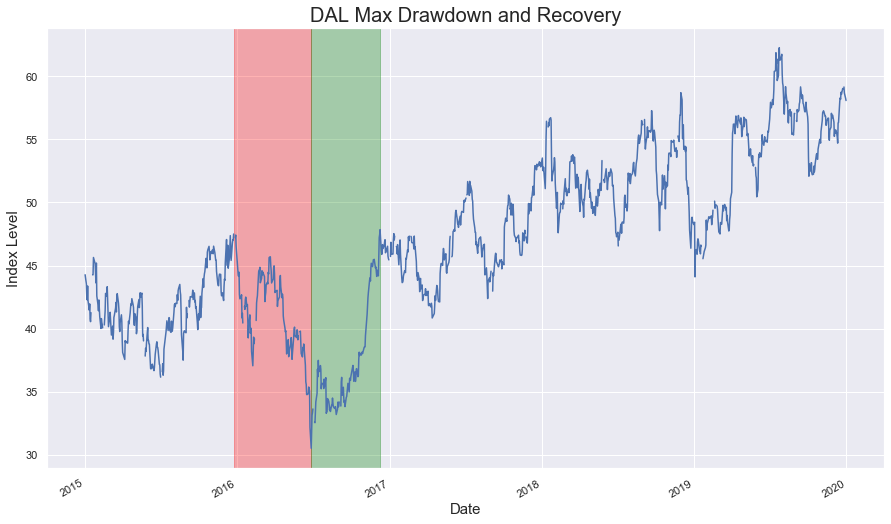

In [43]:
drawdown_stock("DAL")

In [44]:
def mfg_drawdown_stock(ticker):
    """
    Compute and calculate the max drawdown and recovery window for a given stock
    """
    #Calculate drawdown and recovey window
    xs = manufacturers_stock_data["Adj Close", ticker].fillna(method="backfill")
    i = np.argmax(np.maximum.accumulate(xs)-xs)
    j = np.argmax(xs[:i])
    recovery = xs[i:][xs[i:]>xs[j]].index[0]

    #Calculate drawdown porcentage
    max_DD_perc = round(xs[i]/ xs[j] *100,2)

    #Set figure
    plt.figure(figsize=(15,9))

    manufacturers_stock_data["Adj Close",ticker].plot()
    
    #Plot drawdown and recovery window
    plt.axvspan(manufacturers_stock_data.index[i], manufacturers_stock_data.index[j], color="red", alpha=0.3)
    plt.axvspan(manufacturers_stock_data.index[i], recovery, color="green", alpha=0.3)

    plt.title(ticker + " Max Drawdown and Recovery", fontsize=20)
    plt.xlabel("Date",fontsize=15)
    plt.ylabel("Index Level", fontsize=15)

    #Print drawdown information
    print("Max Drawdown period for {} was between {} to {}".format(ticker, xs.index[i].date(), xs.index[j].date()))
    print("Recovery was completed at {} post drawdown".format(recovery.date()))
    print("Maximum drawdown was {}%".format(max_DD_perc))
    
    #plt.savefig(ticker+"_drawdown_plot.png",dpi=150)

Max Drawdown period for AIR.PA was between 2019-01-03 to 2018-08-29
Recovery was completed at 2019-02-15 post drawdown
Maximum drawdown was 73.79%


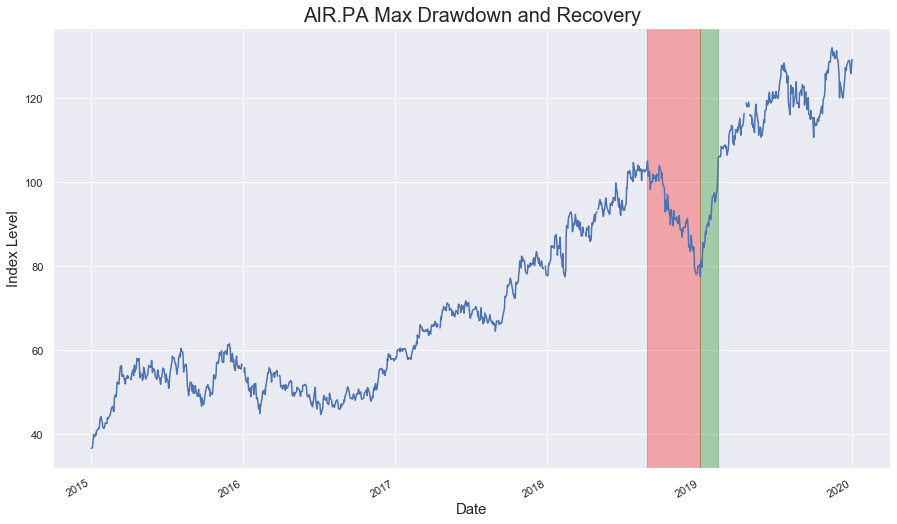

In [45]:
mfg_drawdown_stock("AIR.PA")